In [1]:
import impact
# from impact.module import Dummy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# KI_meta

In [2]:
KI_meta = pd.read_excel('../data/raw/KI_meta.xlsx', index_col=0)
KI_meta.head(5)

name pilot quartier         profile nationalite    sexe     statut age  \
1   zh64   JOR       zh       cbo / ngo      syrian  female  displaced  37   
2   ol65   JOR       ol           other   jordanian    male  displaced  62   
3   sh29   JOR       sh           other   jordanian    male       hote  42   
4  ki163   JOR   health  health - admin   jordanian  female       hote  39   
5  ki008   JOR   health  health - admin   jordanian  female       hote  30   

         Sector        profile_recoded  
1  community ki  cbo / ngo / local gov  
2  community ki                  other  
3           NaN                  other  
4           NaN         health related  
5           NaN         health related

## Number of KIs

Number of KIs in each pilot

- JOR: Jordan, AFG: Afghanistan, NER: Niger, UGA: Uganda. What is AFG_water?

- Start first from NER or UGA, because they have enough samples.

Number of KIs in each quartier
- The data is neat, because there isn't a quartier with multiple pilot.

- Notice AFG_water is only related to kabul_wash. What is kabul_wash, kabul_women?

In [7]:
# Number of KIs in each pilot
pqn = KI_meta[['pilot', 'quartier', 'name']].groupby('pilot')
# Number of KIs in each quartier
qp = KI_meta[['quartier', 'pilot', 'name']].groupby(['quartier', 'pilot']).count()
pq = KI_meta[['quartier', 'pilot', 'name']].groupby(['pilot', 'quartier']).count()
pq_cnt = KI_meta[['quartier', 'pilot']].groupby(['pilot']).nunique()
print(pqn)
print(qp)
print(pq)
print(pqn.nunique())

                             name
quartier          pilot          
adalafu           UGA          30
adjimeri          NER          71
administratif     NER          67
affounori         NER         118
ah                JOR          26
alivu             UGA          34
ambeko            UGA          10
arivu             UGA          26
ariwara           UGA         173
awindiri          UGA         160
bazaar            UGA          39
charre            NER         134
chateau           NER          92
diffa_koura       NER         104
doubai            NER         127
driwala           UGA         105
du                JOR          37
education         JOR          70
fd                JOR          14
festival          NER          78
garin_dogo        NER         317
hb                JOR          21
health            JOR          55
hu                JOR          74
ja                JOR          48
kabul             AFG          84
kabul_wash        AFG_water    35
kabul_women   

In [35]:
KI_meta = pd.read_pickle('../data/merged/KI_meta.pickle')

In [38]:
refer_column = "profile"
change_column = "profile"
refer_value = "a student"
change_value = "student"
KI_meta.loc[KI_meta[refer_column] == refer_value, change_column] = change_value

In [51]:

profile_cnt = KI_meta.groupby('profile').count()
# profile_cnt[profile_cnt['pilot'] == 1]
KI_meta.groupby('age').count().sort_values(by = 'pilot')

pilot  quartier  profile  nationalite  sexe  statut  Sector  \
age                                                                 
85.0      1         1        1            1     1       1       1   
83.0      1         1        1            1     1       1       1   
82.0      1         1        1            1     1       1       1   
78.0      1         1        1            1     1       1       1   
76.0      1         1        1            1     1       1       1   
...     ...       ...      ...          ...   ...     ...     ...   
45.0     57        57       57           57    57      57      57   
30.0     65        65       65           65    65      65      65   
35.0     65        65       65           65    65      65      65   
40.0     67        67       67           67    67      67      67   
nan    3016      3016     3016         3016  3016    3016    3016   

      profile_recoded  code  
age                          
85.0                1     1  
83.0                1     1  
82.0                1     1  
78.0                1     1  
76.0                1     1  
...               ...   ...  
45.0               57    57  
30.0               65    65  
35.0               65    65  
40.0               67    67  
nan              3016  3016  

[68 rows x 9 columns]

In [32]:
profile_cnt[profile_cnt.index == 'student']

pilot  quartier  nationalite  sexe  statut  age  Sector  \
profile                                                            
student     54        54           54    54      54   54      54   

         profile_recoded  code  
profile                         
student               54    54

## Analysing KI info in specific pilots

- profile: need some cleaning and summarize some fancy description into general classes.

 some pilot have a lot of null values: AFG_water, all null; UGA, 134 nulls
 
- nationalite: some pilot have a lot of null values

- sexe, statut: a lot of na in UGA

- age: all age value for NER is missing

- Sector: contains limited information. Most are null values.

number of KIs =  4223
---
pilot =  ['AFG', 'AFG_water', 'JOR', 'NER', 'UGA']
profile
number of profiles =  165
number of profiles which define more than 1 KI =  80
number of null values of profiles =  169
---
nationalite
number of nationality =  6
number of null values of nationality =  1926
             name
nationalite      
Null value   1926
nigerien     1245
nigerian      475
jordanian     313
syrian        260
autre           4
---
sexe
        name
sexe        
female  1901
male    1987
na       335
---
statut
              name
statut            
displaced     1983
hote          1855
migrant         17
na             333
professional     6
voluntary       29
-----
age
number of not null age =  1206
number of null values of age =  3016
---
age interval
---
Sector
               name
Sector             
Null value     3863
community ki    314
hayy alzuhoor    11
wash_ki          35


name
profile                                                 
other                                                620
menage / cuisine                                     535
cultivateur / eleveur / pecheur                      391
unemployed                                           299
vente articles divers                                284
...                                                  ...
he is a head teacher arua prison primary school        1
he is a former head teacher arua public seconda...     1
having served for a long time in the education ...     1
guard                                                  1
youth member                                           1

[165 rows x 1 columns]

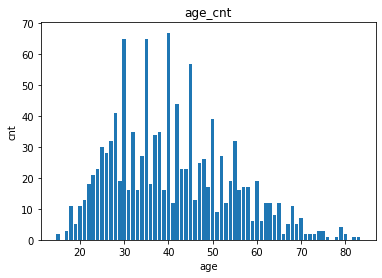

In [10]:
pilot = ['AFG', 'AFG_water', 'JOR', 'NER', 'UGA']#'AFG', 'AFG_water', 'JOR', 'NER', 'UGA'

KI_pilot = KI_meta[KI_meta['pilot'].isin(pilot)]
KI_pilot = KI_pilot.fillna('Null value')
print("number of KIs = ", KI_pilot.shape[0])

print('---')
print('pilot = ', pilot)

# profile
gp_KI_pilot = KI_pilot.groupby(['profile'])
profile_cnt = gp_KI_pilot.count()[['name']].sort_values(by = 'name', ascending = False)
profile_cnt_2 = profile_cnt[profile_cnt['name']>=2]
try: 
    profile_null_cnt = sum(profile_cnt[profile_cnt.index.isin(['na', 'Null value'])]['name'].values)
except:
    profile_null_cnt = 0

print('profile')   
print('number of profiles = ', profile_cnt.shape[0])
print('number of profiles which define more than 1 KI = ', profile_cnt_2.shape[0])
print('number of null values of profiles = ', profile_null_cnt)
#print(profile_cnt_2)

print('---')
#nationalite
gn_KI_pilot = KI_pilot.groupby(['nationalite'])
nat_cnt = gn_KI_pilot.count()[['name']].sort_values(by = 'name', ascending = False)
nat_cnt_2 = nat_cnt[nat_cnt['name']>=2]
try:
    nat_null_cnt = sum(nat_cnt[nat_cnt.index.isin(['na', 'Null value'])]['name'].values)
except:
    nat_null_cnt = 0

print('nationalite')
print('number of nationality = ', nat_cnt.shape[0])
print('number of null values of nationality = ', nat_null_cnt)
print(nat_cnt)


print('---')
#sexe
gs_KI_pilot = KI_pilot.groupby(['sexe'])
sexe_cnt = gs_KI_pilot.count()[['name']]

print('sexe')
print(sexe_cnt)

print('---')
#statut
gst_KI_pilot = KI_pilot.groupby(['statut'])
statut_cnt = gst_KI_pilot.count()[['name']]
print('statut')
print(statut_cnt)

print('-----')
#age
ga_KI_pilot = KI_pilot.groupby(['age'])
age_cnt = ga_KI_pilot.count()[['name']]
age_cnt_num = age_cnt.iloc[:-3, :]
try:
    age_null_cnt = sum(age_cnt[age_cnt.index.isin(['na', 'Null value'])]['name'].values)
except:
    age_null_cnt = 0
print('age')
print("number of not null age = ", sum(age_cnt_num['name']))
print("number of null values of age = ", age_null_cnt)
plt.figure()
plt.bar(age_cnt_num.index, age_cnt_num['name'])
plt.title('age_cnt')
plt.xlabel('age')
plt.ylabel('cnt')

#age_interval
print('---')
print('age interval')

#Sector
print('---')
gse_KI_pilot = KI_pilot.groupby(['Sector'])
Sector_cnt = gse_KI_pilot.count()[['name']]
print('Sector')
print(Sector_cnt)

# profile recorded
profile_cnt